[https://drive.google.com/file/d/1jtCsTsDPYDVK5nDHqMMgmN-4DYBt_-SY/view?usp=sharing](https://drive.google.com/file/d/1jtCsTsDPYDVK5nDHqMMgmN-4DYBt_-SY/view?usp=sharing)

# IDC6210 Capstone Project 
**Team: Perceptron Pals**

Team Leader: Heather Anderson

Team Members: Sara Parrish & Laura Sikes


![](https://les14uwf.github.io/notsure/Customer-Churn.png)

# 1. Preamble

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/churndata/sample_submission.csv
/kaggle/input/churndata/train.csv
/kaggle/input/churndata/test.csv
/kaggle/input/churndata/archive/sample_submission.csv
/kaggle/input/churndata/archive/train.csv
/kaggle/input/churndata/archive/test.csv


In [2]:
import sys
sys.path.insert(0, '..')

import numpy
import matplotlib
import pandas
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

print(f"numpy: {numpy.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"pandas: {pandas.__version__}")
print(f"sklearn: {sklearn.__version__}")

import warnings
warnings.filterwarnings("ignore")

import pandas as pd


df_a = pd.read_csv('/kaggle/input/churndata/train.csv')
df_h = pd.read_csv('/kaggle/input/churndata/test.csv')

numpy: 1.26.4
matplotlib: 3.7.5
pandas: 2.2.3
sklearn: 1.2.2


Train dataset named "df_a" and test dataset named "df_h" -LS

# 2. Data Exploration

In [3]:
df_a.head()

,id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,label
0,1815,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,0
1,5947,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,1
2,3882,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,0
3,2390,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,0
4,3677,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,0


In [4]:
df_h.head()

,id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,3382,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,6181,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,4830,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,3738,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,4250,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


**Review for missing values and data types.  Of the 5634 observations and 21 features, there are no missing values; however, 16 values are objects and will likely need to be mapped.**  

In [5]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5634 non-null   int64  
 1   gender             5634 non-null   object 
 2   senior_citizen     5634 non-null   int64  
 3   partner            5634 non-null   object 
 4   dependents         5634 non-null   object 
 5   tenure             5634 non-null   int64  
 6   phone_service      5634 non-null   object 
 7   multiple_lines     5634 non-null   object 
 8   internet_service   5634 non-null   object 
 9   online_security    5634 non-null   object 
 10  online_backup      5634 non-null   object 
 11  device_protection  5634 non-null   object 
 12  tech_support       5634 non-null   object 
 13  streaming_tv       5634 non-null   object 
 14  streaming_movies   5634 non-null   object 
 15  contract           5634 non-null   object 
 16  paperless_billing  5634 

## Target Variable

The target variable is the 'label' column, which indicates whether the customer churned (1) or not (0).  There are 5634 observations, all integers.


Note from the data page: 

*Target variable column indicating if the customer churned (1) or not (0). Note that this column in your submission file should be 'prediction probability' for each sample, not (1) or (0).*

## Exploring object variables

In [6]:
#id categorical features
categorical_cols = df_a.select_dtypes(include=['object']).columns

#loop through and print value counts
for col in categorical_cols:
    print(f"Value Counts for '{col}':\n")
    print(df_a[col].value_counts(), "\n" + "-"*50 + "\n")

Value Counts for 'gender':

gender
Male      2838
Female    2796
Name: count, dtype: int64 
--------------------------------------------------

Value Counts for 'partner':

partner
No     2932
Yes    2702
Name: count, dtype: int64 
--------------------------------------------------

Value Counts for 'dependents':

dependents
No     3968
Yes    1666
Name: count, dtype: int64 
--------------------------------------------------

Value Counts for 'phone_service':

phone_service
Yes    5087
No      547
Name: count, dtype: int64 
--------------------------------------------------

Value Counts for 'multiple_lines':

multiple_lines
No                  2700
Yes                 2387
No phone service     547
Name: count, dtype: int64 
--------------------------------------------------

Value Counts for 'internet_service':

internet_service
Fiber optic    2479
DSL            1934
No             1221
Name: count, dtype: int64 
--------------------------------------------------

Value Counts for 'o

*Gender* is split into male / female script values only, and is farily evenly distributed.  

*Parnter* is split into no/yes script values and is also fairly evenly distributed.

*Dependents* is split into no/yes script values and skews heavily 'no'. 

*Phone_service* contains no/yes script values and skews heavily toward yes.

*Multiple_lines* contains no, yes, and no phone service script values.

*Total_charges* is listed as an object but appear to be continuous values that should be converted to floats.

### SMOTE will be needed to address class imbalance. 

In [7]:
df_a['label'].value_counts()

label
0    4113
1    1521
Name: count, dtype: int64

### Identifying NaNs

In [8]:
df_a.isna().sum()

id                   0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
label                0
dtype: int64

In [9]:
df_h.isna().sum()

id                   0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64

There are no NaNs in the original dataset, but the blank values in total_charges are forced to NaNs with the `pd.to_numeric()` function. 

In [10]:
df_a.apply(lambda col: (col == " ").sum())

id                   0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        8
label                0
dtype: int64

Since a blank value is not indicative of zero monthly charges, it may be safest to replace these with the mean total_charges. However, 'Tenure' (months of service) is '0' for all of the listed accounts, so it is likely that the monthly charge listed is the first they have received. 

In [11]:
df_a[df_a['total_charges'].str.strip() == ""]

,id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,label
899,3827,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
2224,937,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2697,1083,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
3054,5219,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
3488,6755,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0
4056,489,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
4761,1341,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
5607,754,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0


## Fixing the 'Total_Charges'

Here the 'total_charges' column is converted to numeric, forcing all blank values to NaNs. The the 'total_charges' feature is investigated with its descriptive statistics. 

In [12]:
#force blank values to nan
df_a['total_charges'] = pd.to_numeric(df_a['total_charges'], errors = 'coerce')

#descriptive stats for total_charges of whole dataset
df_a['total_charges'].describe()

count    5626.000000
mean     2280.662380
std      2266.394623
min        18.800000
25%       391.900000
50%      1394.800000
75%      3794.487500
max      8684.800000
Name: total_charges, dtype: float64

As the mean takes into account customers with much longer tenures, substituting with that would be inappropriate.

In [13]:
df_a[df_a['tenure'] == 0]['total_charges']

899    NaN
2224   NaN
2697   NaN
3054   NaN
3488   NaN
4056   NaN
4761   NaN
5607   NaN
Name: total_charges, dtype: float64

And seeing that all accounts with `'tenure' == 0` have a 'total_charge' amount that is not accounted for, it is best to set the value equal to the monthly charge amount. 

In [14]:
df_a['total_charges'].fillna(df_a['monthly_charges'], inplace=True)

And repeating the process for the test data. 

In [15]:
#convert total charges to numeric
df_h['total_charges'] = pd.to_numeric(df_h['total_charges'], errors='coerce')

#replace NaN with monthly_charge
df_h['total_charges'].fillna(df_h['monthly_charges'], inplace=True)

## Visualizations for Data Exploration

Churn Distribution:

A count plot to show the balance between customers who churned (1) and those who did not (0).

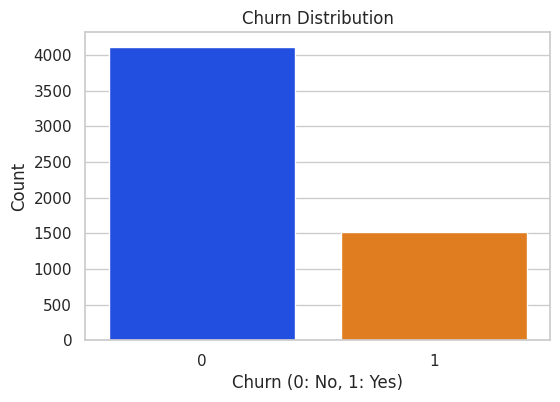

In [16]:
sns.set(style="whitegrid", palette="bright")

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df_a)
plt.title("Churn Distribution")
plt.xlabel("Churn (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

## Distributions of Numeric Variables

Histograms (with KDE curves) are used below to visualize the distributions of tenure and monthly charges.

Text(0.5, 1.0, 'Distribution of Monthly Charges')

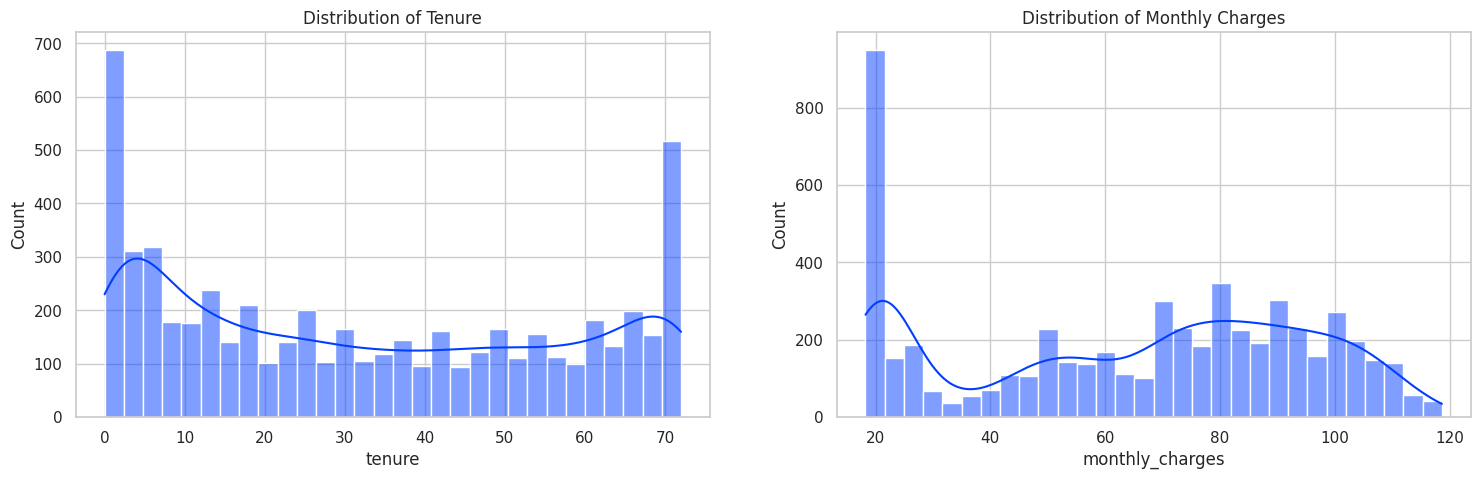

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.histplot(df_a['tenure'], bins=30, kde=True, ax=ax[0])
ax[0].set_title("Distribution of Tenure")

sns.histplot(df_a['monthly_charges'], bins=30, kde=True, ax=ax[1])
ax[1].set_title("Distribution of Monthly Charges")

## Box Plots

These plots compare the distributions of some key numeric features (tenure and monthly charges) grouped by churn status. This helps reveal differences or outliers.

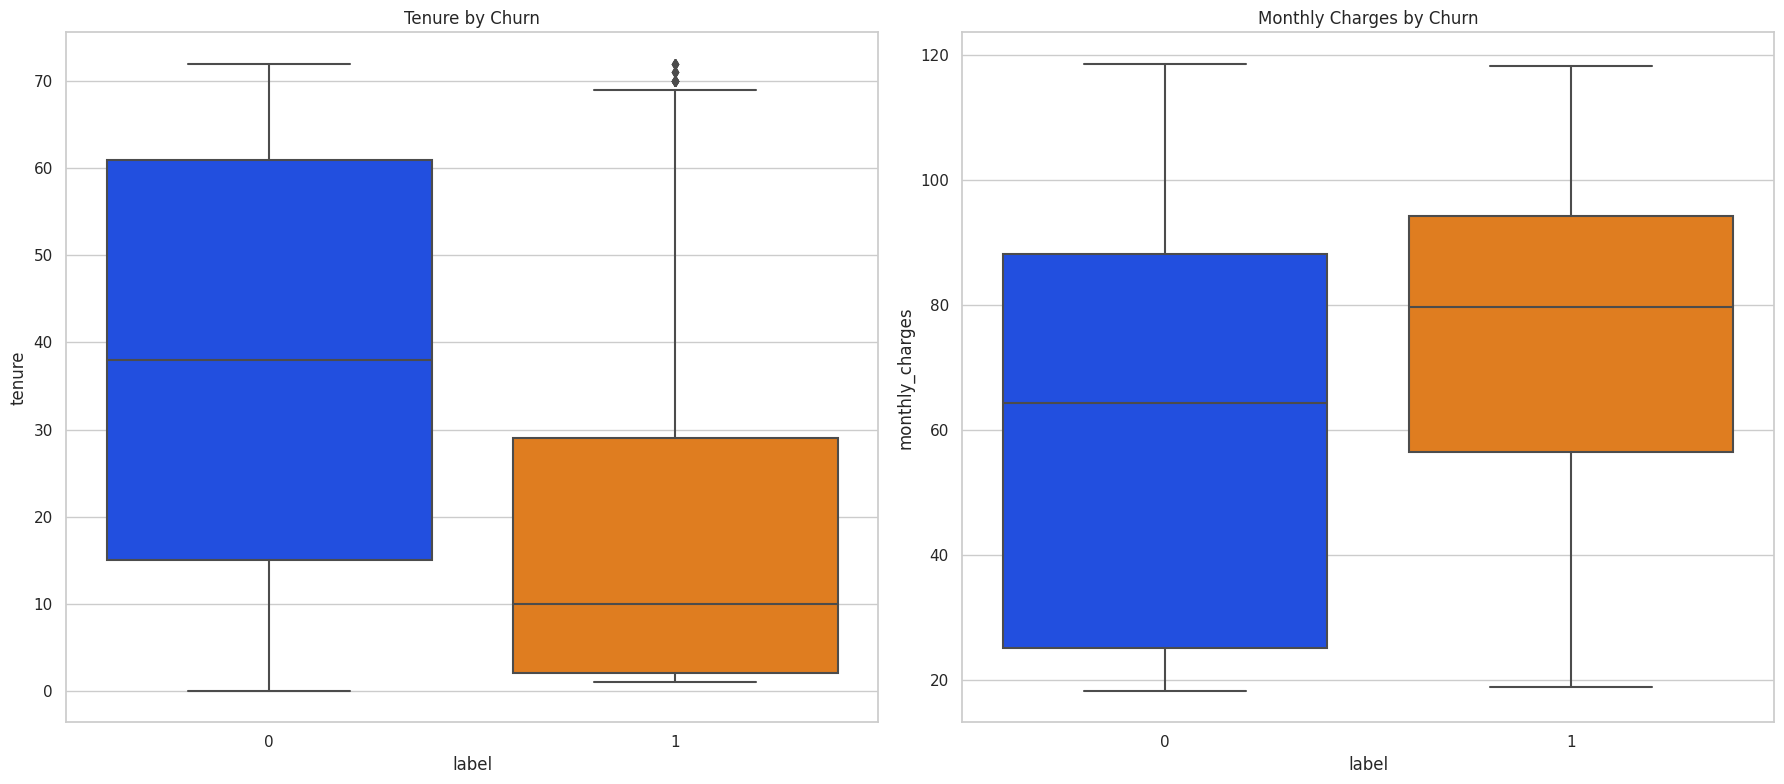

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.boxplot(x='label', y='tenure', data=df_a, ax=ax[0])
ax[0].set_title("Tenure by Churn")

sns.boxplot(x='label', y='monthly_charges', data=df_a, ax=ax[1])
ax[1].set_title("Monthly Charges by Churn")

plt.tight_layout()
plt.show()

## Countplot 
Side-by-Side Bars by Churn

This plot shows how many customers fall into each contract category, split by churn.

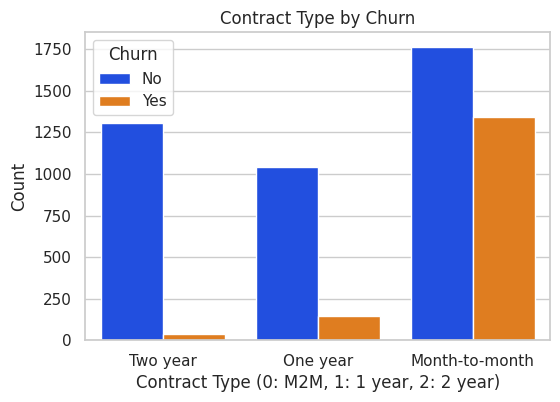

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='contract', hue='label', data=df_a, palette='bright')
plt.title("Contract Type by Churn")
plt.xlabel("Contract Type (0: M2M, 1: 1 year, 2: 2 year)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

## Categorical Feature Distributions 

Count plots for categorical variables like gender, partner, and dependents to look at their distributions.

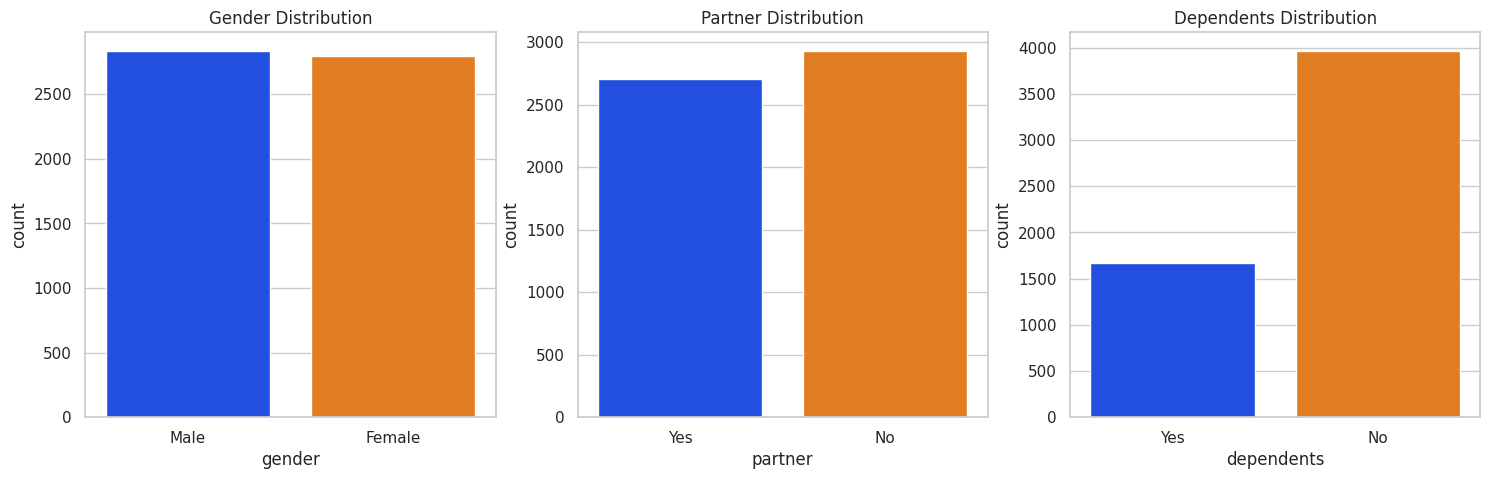

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='gender', data=df_a, ax=ax[0])
ax[0].set_title("Gender Distribution")

sns.countplot(x='partner', data=df_a, ax=ax[1])
ax[1].set_title("Partner Distribution")

sns.countplot(x='dependents', data=df_a, ax=ax[2])
ax[2].set_title("Dependents Distribution")
plt.show()

## Heatmap of Features

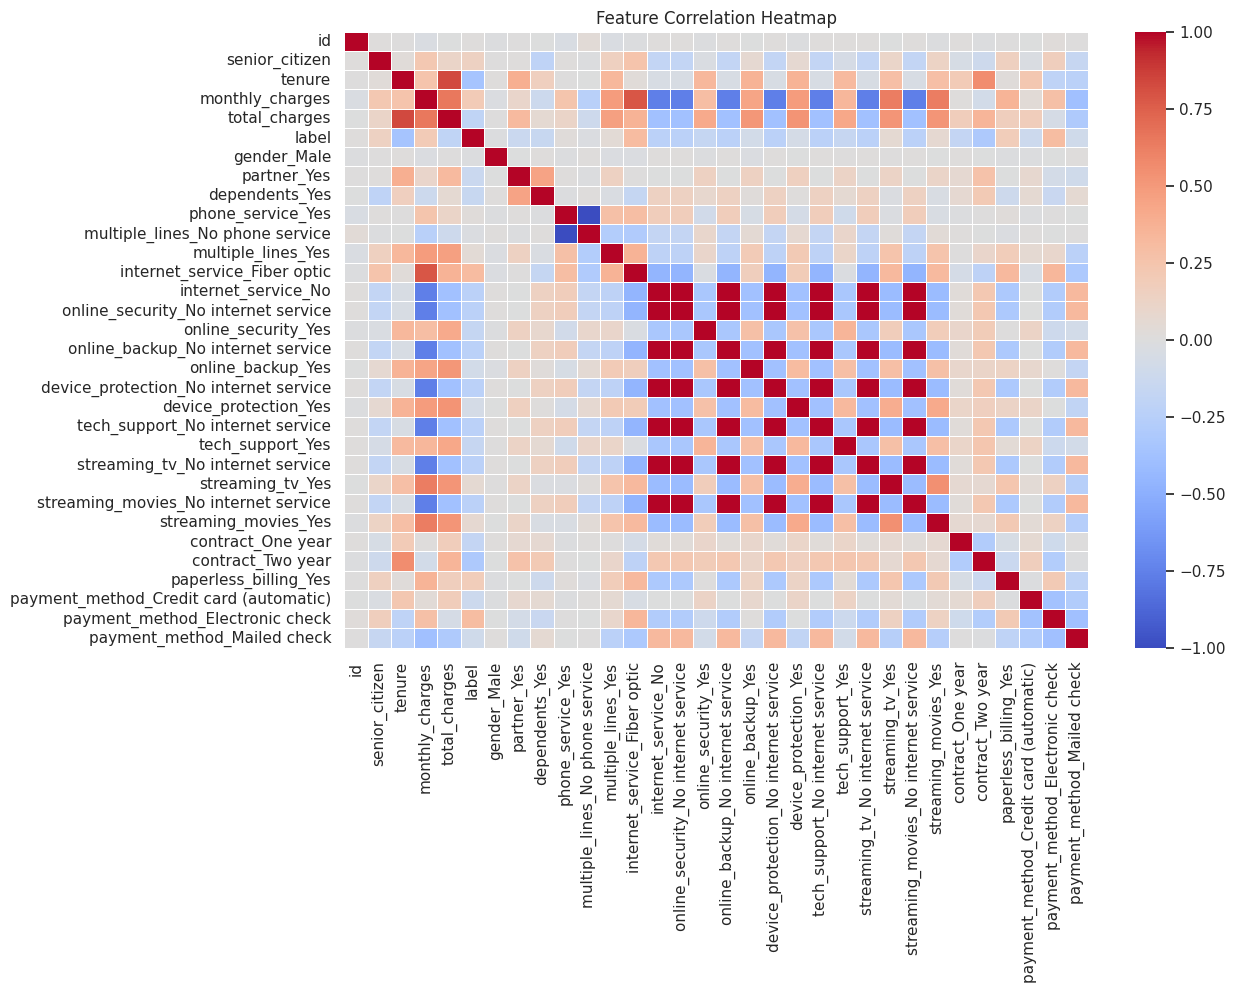

In [21]:
#encode
df_encoded = pd.get_dummies(df_a, drop_first=True)

#corr matrix
corr_matrix = df_encoded.corr()

#plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

## Exploring Possible Features to Engineer

Converning the continuous features, tenure and total charge would be expected to have a multicollinear relationship. Monthly charges versus tenure may have a different relationship. 

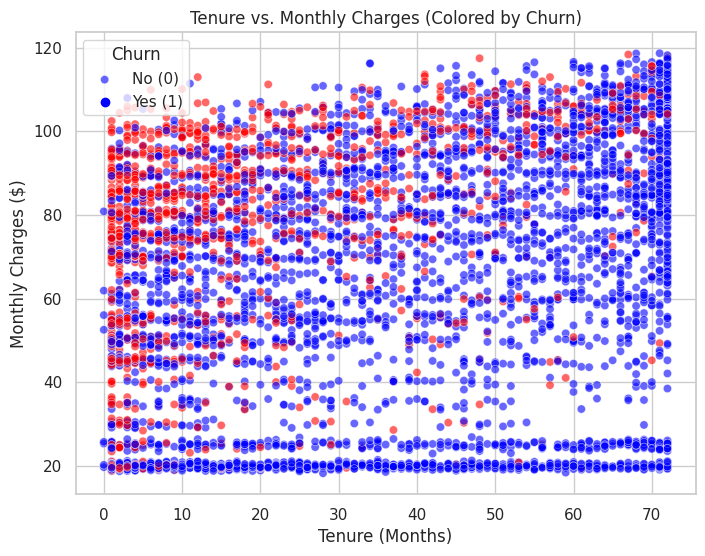

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot with churn as hue
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_a, x='tenure', y='monthly_charges', hue='label', palette={0: 'blue', 1: 'red'}, alpha=0.6)

# Formatting
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges ($)")
plt.title("Tenure vs. Monthly Charges (Colored by Churn)")
plt.legend(title="Churn", labels=["No (0)", "Yes (1)"])
plt.grid(True)

# Show plot
plt.show()


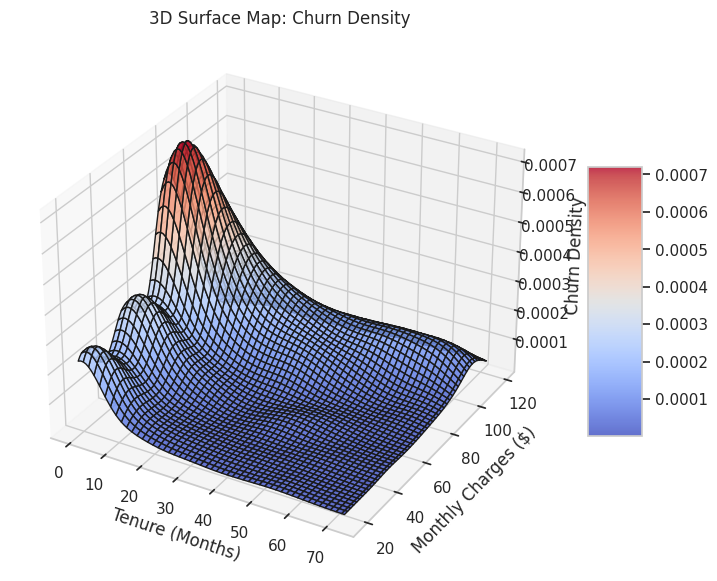

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

#extract features
X = df_a[['tenure', 'monthly_charges']]
y = df_a['label']

# Make grids for tenure & monthly_charges
tenure_grid = np.linspace(X['tenure'].min(), X['tenure'].max(), 100)
charges_grid = np.linspace(X['monthly_charges'].min(), X['monthly_charges'].max(), 100)
T, C = np.meshgrid(tenure_grid, charges_grid)

#fit KDE model to estimate churn density
churn_density = gaussian_kde(X[y == 1].T)(np.vstack([T.ravel(), C.ravel()]))
churn_density = churn_density.reshape(T.shape)

#3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

#plot surface
surf = ax.plot_surface(T, C, churn_density, cmap='coolwarm', edgecolor='k', alpha=0.8)

#labels
ax.set_xlabel("Tenure (Months)")
ax.set_ylabel("Monthly Charges ($)")
ax.set_zlabel("Churn Density")
ax.set_title("3D Surface Map: Churn Density")

#color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()


# 3. Preprocessing

## Overview:

- Target variable: label (churn or not)
- Features: Categorical, Numerical, and Ordinal
- Training | Validation Split: (70/30, 75/25, 80/20)
- Stratified split to maintain class balance

## ColumnTransformer for Encoding, Scaling, and Splitting 

#### The Train/Test Split

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

#id all categorical, num features
cat_feat = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
                    'internet_service', 'online_security', 'online_backup', 
                    'device_protection', 'tech_support', 'streaming_tv', 
                    'streaming_movies', 'paperless_billing', 'payment_method']
num_feat = ['tenure', 'monthly_charges', 'total_charges']
ord_feat = ['contract']

ord_order = ['Month-to-month', 'One year', 'Two year']

#id target and predictor features
X = df_a.drop(columns=['id','label'])
y = df_a['label']

#split
X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=1, 
    stratify=y)

#define transformers: ohe, scaler
cat_trf = OneHotEncoder(handle_unknown='ignore')
num_trf = StandardScaler() 
ord_trf = OrdinalEncoder(categories=[ord_order])

#define scld columntransformer
preprocessor_scld = ColumnTransformer(
    transformers=[
        ("cat", cat_trf, cat_feat),
        ("num", num_trf, num_feat),
        ("ord", ord_trf, ord_feat) ], 
    remainder='passthrough')


#define unscld columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_trf, cat_feat),
        ("ord", ord_trf, ord_feat) ], 
    remainder='passthrough')


#transforming train data
X_train_scld = preprocessor_scld.fit_transform(X_train)
X_val_scld = preprocessor_scld.transform(X_val)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

#### Encoding, Scaling Test Data

In [25]:
#id target and predictor features
X_test = df_h.drop(columns=['id'])

#transsforming test data
X_test_scld = preprocessor_scld.transform(X_test)

X_test = preprocessor.transform(X_test)

To review, we have the training splits:

**Not encoded, not scaled:**
- X_train, X_val


**Encoded, scaled:**
- X_train_scld, X_val_scld


With a similar labelling of the test set:

**Not encoded, not scaled:**
- X_test

**Encoded, scaled:**
- X_test_scld

## SMOTE-NC

The original training sets were overwritten with the SMOTE-NC (Nominal and Categorical) training set in an attempt to improve accuracy.

In [26]:
from imblearn.over_sampling import SMOTENC

#id target and predictor features
X = df_a.drop(columns=['id','label'])
y = df_a['label']

#ord_order needed to be changed to a list of lists to work in the following encoding
ord_feat = ['contract']
ord_order = [['Month-to-month', 'One year', 'Two year']]

#encode ord features before smote
ord_trf = OrdinalEncoder(categories=ord_order)
X[ord_feat] = ord_trf.fit_transform(X[ord_feat])


#get cat indices
cat_indices = [X.columns.get_loc(col) for col in cat_feat]

#use smotenc
smote = SMOTENC(categorical_features=cat_indices, random_state=11)
X_smote, y_smote = smote.fit_resample(X, y)

#split
X_train, X_val, y_train, y_val = train_test_split(
    X_smote, 
    y_smote, 
    test_size=0.3, 
    random_state=1, 
    stratify=y_smote)

#define scld columntransformer
preprocessor_scld = ColumnTransformer(
    transformers=[
        ("cat", cat_trf, cat_feat),
        ("num", num_trf, num_feat)],
    remainder='passthrough')

#define unscld columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_trf, cat_feat)], 
    remainder='passthrough')

#transforming train data
X_train_scld = preprocessor_scld.fit_transform(X_train)
X_val_scld = preprocessor_scld.transform(X_val)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

## Feature Engineering

New Feature: monthly charges per tenure

In [27]:
df_a['mc_tenure'] = df_a['monthly_charges'] / (df_a['tenure'] + 1)
df_h['mc_tenure'] = df_h['monthly_charges'] / (df_h['tenure'] + 1)

In [28]:
df_a['mc_tenure'].describe()

count    5634.000000
mean        5.784603
std         8.723790
min         0.264384
25%         1.250000
50%         2.078994
75%         5.994167
max        80.850000
Name: mc_tenure, dtype: float64

## SMOTE-Tomek

`SMOTETomek` combines SMOTE's oversampling with cleaning via Tomek undersampling to reduce the amount of noise of the synthetic samples. Regular SMOTE can be known to generate noisy data. With SMOTETomek we will first preprocess all  of the features before applying the sampling methods. 

In [29]:
from imblearn.combine import SMOTETomek

#update cont feat
num_feat = ['tenure', 'monthly_charges', 'total_charges', 'mc_tenure']

#prep data
X = df_a.drop(columns=['id', 'label'])
y = df_a['label']
X_test = df_h.drop(columns=['id'])

#define scld columntransformer
preprocessor_scld = ColumnTransformer(
    transformers=[
        ("cat", cat_trf, cat_feat),
        ("num", num_trf, num_feat),
        ("ord", ord_trf, ord_feat)], 
    remainder='passthrough')

#transforming train data
X = preprocessor_scld.fit_transform(X)
X_test = preprocessor_scld.transform(X_test)

#SMOTETomek balancing
smote_tomek = SMOTETomek(random_state=11)
X_smote, y_smote = smote_tomek.fit_resample(X, y)

#split
X_train_scld, X_val_scld, y_train, y_val = train_test_split(
    X_smote, 
    y_smote, 
    test_size=0.2, 
    random_state=11, 
    stratify=y_smote)

In [30]:
#print feature names made in processing
feature_names = preprocessor_scld.get_feature_names_out()
print(feature_names) 

#find new feature name for monthly_charges
monthly_charges_col = [col for col in feature_names if 'mc_tenure' in col][0]
print(f"Using column name: {monthly_charges_col}")


['cat__gender_Female' 'cat__gender_Male' 'cat__partner_No'
 'cat__partner_Yes' 'cat__dependents_No' 'cat__dependents_Yes'
 'cat__phone_service_No' 'cat__phone_service_Yes' 'cat__multiple_lines_No'
 'cat__multiple_lines_No phone service' 'cat__multiple_lines_Yes'
 'cat__internet_service_DSL' 'cat__internet_service_Fiber optic'
 'cat__internet_service_No' 'cat__online_security_No'
 'cat__online_security_No internet service' 'cat__online_security_Yes'
 'cat__online_backup_No' 'cat__online_backup_No internet service'
 'cat__online_backup_Yes' 'cat__device_protection_No'
 'cat__device_protection_No internet service' 'cat__device_protection_Yes'
 'cat__tech_support_No' 'cat__tech_support_No internet service'
 'cat__tech_support_Yes' 'cat__streaming_tv_No'
 'cat__streaming_tv_No internet service' 'cat__streaming_tv_Yes'
 'cat__streaming_movies_No' 'cat__streaming_movies_No internet service'
 'cat__streaming_movies_Yes' 'cat__paperless_billing_No'
 'cat__paperless_billing_Yes'
 'cat__payment_m

<center> Summary of Transformations </center>

| Feature Type                           | Preprocessing Applied            |
|----------------------------------------|----------------------------------|
| Categorical (e.g., gender, contract type) | One-Hot Encoding                 |
| Numerical (e.g., tenure, charges)     | Standard Scaling (optional)      |
| Ordinal (e.g., contract type)         | Ordinal Encoding                 |
| Target Variable (label)             | No transformation (remains binary) |

# 4. Model Training

## Overview:

Models:

- Perceptron, Linear Regression, SVM, KNN
- Decision Trees, Random Forest
- Halving GridSearch
    - Logistic Regression
    - Random Forest
- XGBoost
- XGBoost Halving Grid Search
- Performance Dataframe

In [31]:
#making a log for accuracy scores
#empty list
results = []

#append model format
#results.append(('name', 'hp1', 'hp2', 'data', 'accuracy', 'ROC-AUC'))

## Perceptron, Linear Regression, SVM, KNN

The perceptron class is run out of curiosity, but it cannot predict probabilities so it is not viable for the task. 

In [32]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(random_state=1)
ppn.fit(X_train_scld, y_train)
y_pred_ppn = ppn.predict(X_val_scld)
accuracy = accuracy_score(y_val, y_pred_ppn)
results.append(('Perceptron', 'default','-', 'x_train_scld', '-', accuracy))
print(accuracy)

0.7528373266078184


`predict_proba` is set to predict the probability that a customer will churn (label = 1)

In [33]:
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

#define models to use in for loop
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC(probability=True)),
    ('KNN', KNeighborsClassifier())]

#loop to train each model
for name, model in models:
    model.fit(X_train_scld, y_train)
    y_val_pred = model.predict_proba(X_val_scld)[:, 1]
    y_val_pred1 = model.predict(X_val_scld)
    accuracy = accuracy_score(y_val, y_val_pred1)
    roc_auc = roc_auc_score(y_val, y_val_pred)
    results.append((name, 'default', '-', 'x_train_scld', roc_auc, accuracy))
    print(f'{name}: ROC-AUC = {roc_auc:.4f}, Accuracy = {accuracy}')


Logistic Regression: ROC-AUC = 0.8637, Accuracy = 0.7667087011349306
SVM: ROC-AUC = 0.8960, Accuracy = 0.8165195460277428
KNN: ROC-AUC = 0.8824, Accuracy = 0.8007566204287516


## Decison Trees, Random Forest

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#define models to use in for loop
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=11)),
    ('Random Forest', RandomForestClassifier(random_state=11))]

#loop to train each model
for name, model in models:
    model.fit(X_train_scld, y_train)
    y_val_pred = model.predict_proba(X_val_scld)[:, 1]
    y_val_pred1 = model.predict(X_val_scld)
    accuracy = accuracy_score(y_val, y_val_pred1)
    roc_auc = roc_auc_score(y_val, y_val_pred)
    results.append((name, 'default', '-', 'X_train', round(roc_auc, 4), accuracy))
    print(f'{name}: ROC-AUC = {roc_auc:.4f}, Accuracy = {accuracy}')


Decision Tree: ROC-AUC = 0.8145, Accuracy = 0.8139974779319041
Random Forest: ROC-AUC = 0.9372, Accuracy = 0.8701134930643127


## Halving GridSearch

### Logistic Regression

In [35]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

#define parameter grids
param_grid_lr = [
    {'C': [0.001, 0.01, 0.1, 1, 10], 
     'penalty': ['l1'], 
     'solver': ['liblinear']}, 
    {'C': [0.001, 0.01, 0.1, 1, 10], 
     'penalty': ['l2'], 
     'solver': ['liblinear', 'lbfgs']}]

#gridsearch
lr_hpo = HalvingGridSearchCV(LogisticRegression(),
                             param_grid_lr,
                             cv=5,
                             factor=2,
                             resource='n_samples',
                             scoring='accuracy',
                             n_jobs=-1,
                            verbose=1)

lr_hpo.fit(X_train_scld, y_train)

#get best model
best_lr = lr_hpo.best_estimator_
best_params = lr_hpo.best_params_

#ROC-AUC score
roc_auc_lr = roc_auc_score(y_val, best_lr.predict_proba(X_val_scld)[:, 1])

#accuracy
y_val_pred_lr = best_lr.predict(X_val_scld)
accuracy = accuracy_score(y_val, y_val_pred_lr)

#append
results.append((
    'Logistic Regression', 
    best_params.get('C', '-'), 
    best_params.get('solver', '-'), 
    'X_train_scld', 
    round(roc_auc_lr, 4), 
    round(accuracy, 4)))

print(f"Best Logistic Regression Parameters: {best_params}")
print(f"Best ROC-AUC: {roc_auc_lr:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 792
max_resources_: 6340
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 15
n_resources: 792
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 8
n_resources: 1584
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 2
n_candidates: 4
n_resources: 3168
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 3
n_candidates: 2
n_resources: 6336
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC-AUC: 0.8631
Validation Accuracy: 0.7686


### Random Forest

In [36]:
#define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 40, 80],
    'criterion': ['gini', 'entropy']}

#gridsearch
rf_hpo = HalvingGridSearchCV(RandomForestClassifier(random_state=11),
                             param_grid_rf,
                             cv=5,
                             factor=2,
                             resource='n_samples',
                             scoring='accuracy',
                             n_jobs=-1,
                             verbose=1)

rf_hpo.fit(X_train_scld, y_train)

#get best model
best_rf1 = rf_hpo.best_estimator_
best_params1 = rf_hpo.best_params_

#ROC-AUC
roc_auc_rf = roc_auc_score(y_val, best_rf1.predict_proba(X_val_scld)[:, 1])

#accuracy
y_val_pred_rf = best_rf1.predict(X_val_scld)
accuracy = accuracy_score(y_val, y_val_pred_rf)

#append
results.append((
    'Random Forest1', 
    best_params1.get('n_estimators', '-'), 
    best_params1.get('max_depth', '-'), 
    'X_train_scld',
    round(roc_auc_rf, 4), 
    round(accuracy, 4)))

print(f"Best Random Forest Parameters: {best_params1}")
print(f"Best ROC-AUC: {roc_auc_rf:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 198
max_resources_: 6340
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 40
n_resources: 198
Fitting 5 folds for each of 40 candidates, totalling 200 fits
----------
iter: 1
n_candidates: 20
n_resources: 396
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 2
n_candidates: 10
n_resources: 792
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 3
n_candidates: 5
n_resources: 1584
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 3
n_resources: 3168
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 5
n_candidates: 2
n_resources: 6336
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 40, 'n_estimators': 200}
Best ROC-AUC: 0.9411
Validation Accuracy: 0.8733


## XGBoost

In [37]:
import xgboost as xgb

#set hyperparams
xgb_model = xgb.XGBClassifier(
    n_estimators=500, 
    learning_rate=0.05, 
    max_depth=8, 
    random_state=11, 
    device= 'gpu')

#train
xgb_model.fit(X_train_scld, y_train)

#predict probability of churn
y_val_proba = xgb_model.predict_proba(X_val_scld)[:, 1]

#roc-auc
val_auc_xgb = roc_auc_score(y_val, xgb_model.predict_proba(X_val_scld)[:, 1])

#accuracy
y_val_pred_xg = xgb_model.predict(X_val_scld)
accuracy_xgb = accuracy_score(y_val, y_val_pred_xg)

#append
results.append((
    'XGBoost', 
    xgb_model.n_estimators, 
    xgb_model.max_depth, 
    'X_train_scld', 
    val_auc_xgb, 
    accuracy_xgb))

print(f'XGboost ROC-AUC 'f'{val_auc_xgb:.4f}, Accuracy' f'{accuracy_xgb:.4f}')

XGboost ROC-AUC 0.9420, Accuracy0.8644


## XGBoost Halving Grid Search

```
from sklearn.metrics import roc_auc_score, make_scorer

#define parameter grid
param_grid_xg = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [6, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'gamma': [ 0.1, 0.5]}

#define gridsearch
xgb_hpo = HalvingGridSearchCV(
    estimator=xgb.XGBClassifier(random_state=11, device='gpu'),
    param_grid=param_grid_xg,
    cv=5,
    factor=2,
    scoring='accuracy',
    verbose=1
)

#search
xgb_hpo.fit(X_train_scld, y_train)

#get best params and best accuracy
best_params = xgb_hpo.best_params_
best_accuracy = xgb_hpo.best_score_

#get best model
best_xgb_model = xgb_hpo.best_estimator_  

#predict on validation 
y_val_pred_xg = best_xgb_model.predict(X_val_scld)  
val_accuracy = accuracy_score(y_val, y_val_pred_xg)  # Compute accuracy

#append
results.append(('XGBoost', 
    best_params['n_estimators'], 
    best_params['max_depth'], 
    best_params['learning_rate'], 
    best_accuracy,
    val_accuracy))

#print
print(f"Best XGBoost Accuracy (CV): {best_accuracy:.4f}")
print(f"Validation Set Accuracy: {val_accuracy:.4f}")
print("Best Parameters:", best_params)
```

## RF with Feature Selection

In [38]:
#train
best_rf = RandomForestClassifier(n_estimators=200, 
                                 max_depth=None, 
                                 min_samples_split=2,
                                 min_samples_leaf=4, 
                                 max_features='auto', 
                                 bootstrap=False, 
                                 random_state=11)
best_rf.fit(X_train_scld, y_train)

#get feature importance
importances = best_rf.feature_importances_
important_features = pd.DataFrame({"Feature": feature_names, "Importance": importances})
important_features = important_features.sort_values(by="Importance", ascending=False)

#keep 30
important_feature_names = important_features.head(30)["Feature"].values

#include 'monthly_charges'
important_feature_names = list(important_feature_names)
if monthly_charges_col not in important_feature_names:
   important_feature_names.append(monthly_charges_col)

#reduce features
X_train_rf = pd.DataFrame(X_train_scld, columns=feature_names)[important_feature_names]
X_val_rf = pd.DataFrame(X_val_scld, columns=feature_names)[important_feature_names]
X_test_rf = pd.DataFrame(X_test, columns=feature_names)[important_feature_names]

#retrain RF
best_rf.fit(X_train_rf, y_train)

#scores for feature selected model
rf_auc = roc_auc_score(y_val, best_rf.predict_proba(X_val_rf)[:, 1])
rf_acc = accuracy_score(y_val, best_rf.predict(X_val_rf))

#append
results.append((
    'RF-Feature Selection', 
    best_rf.n_estimators, 
    best_rf.max_depth, 
    'X_train_scld', 
    rf_auc, 
    rf_acc))

#printerd with xgboost as it's the other high scorer
print(f'Random Forest ROC-AUC (Feature Selected): {rf_auc:.4f}, Accuracy: {rf_acc}')
print(f'XGBoost ROC-AUC: {val_auc_xgb:.4f}, Accuracy: {accuracy_xgb:.4f}')

Random Forest ROC-AUC (Feature Selected): 0.9322, Accuracy: 0.8593947036569988
XGBoost ROC-AUC: 0.9420, Accuracy: 0.8644


## Comparison of Performance

In [39]:
roc_df = pd.DataFrame(results, columns=['Model', 'param1', 'param2', 'data', 'ROC-AUC', 'accuracy'])

#sort descending
roc_df = roc_df.sort_values(by='accuracy', ascending=False)

roc_df.head(10)

,Model,param1,param2,data,ROC-AUC,accuracy
7,Random Forest1,200,40,X_train_scld,0.9411,0.873300
5,Random Forest,default,-,X_train,0.9372,0.870113
8,XGBoost,500,8,X_train_scld,0.941956,0.864439
9,RF-Feature Selection,200,None,X_train_scld,0.932205,0.859395
2,SVM,default,-,x_train_scld,0.895954,0.816520
4,Decision Tree,default,-,X_train,0.8145,0.813997
3,KNN,default,-,x_train_scld,0.88238,0.800757
6,Logistic Regression,0.1,liblinear,X_train_scld,0.8631,0.768600
1,Logistic Regression,default,-,x_train_scld,0.863676,0.766709
0,Perceptron,default,-,x_train_scld,-,0.752837


Random Forest performed well because it could easily separate customers who are likely to churn based on key features like contract type and monthly charges. This is because it easily handles high-dimensional data. Tree-based models can adapt to the different patterns in customer behavior.

XGBoost was a top performer because it builds in multiple trees sequentially, improving predictions by correcting previous errors. This can be a benefit whe predicting the behavior of customers with mixed service types or unusual billing patterns. Its built-in regularization also prevents overfitting, making it more reliable. 

Other models struggled — Logistic Regression oversimplified customer churn with a linear decision boundary. KNN and SVM are both sensitive to feature scaling, computationally expensive, and struggle with high dimensionality in data. 

# 5. Model Deployment

## First Attempt

#### Preprocessing for the Test Data

In [40]:
#id target and predictor features
Xh = df_h.drop(columns=['id'])

#ord_order needed to be changed to a list of lists to work in the following encoding
ord_feat = ['contract']
ord_order = [['Month-to-month', 'One year', 'Two year']]

#encode ord features before smote
ord_trf = OrdinalEncoder(categories=ord_order)

#define scld columntransformer
preprocessor_scld = ColumnTransformer(
    transformers=[
        ("cat", cat_trf, cat_feat),
        ("num", num_trf, num_feat),
        ("ord", ord_trf, ord_feat)],
    remainder='passthrough')

#define unscld columntransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", cat_trf, cat_feat), 
        ("ord", ord_trf, ord_feat)], 
    remainder='passthrough')

#transforming train data
Xh_scld = preprocessor_scld.fit_transform(Xh)

Xh_unscld = preprocessor.fit_transform(Xh)

#### XGBoost Model for Deployment

In [41]:
import xgboost as xgb

#set hyperparams
xgb_model = xgb.XGBClassifier(
    n_estimators=500, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=11, 
    device= 'gpu')

#train
xgb_model.fit(X_train_scld, y_train)

#predict probability of churn
y_val_proba = xgb_model.predict_proba(X_val_scld)[:, 1]

#roc-auc
val_auc = roc_auc_score(y_val, xgb_model.predict_proba(X_val_scld)[:, 1])

#accuracy
y_val_pred_xg = xgb_model.predict(X_val_scld)
accuracy = accuracy_score(y_val, y_val_pred_xg)

print(f'XGboost ROC-AUC 'f'{val_auc:.4f}, Accuracy' f'{accuracy:.4f}')

XGboost ROC-AUC 0.9420, Accuracy0.8613


#### ROC Curve

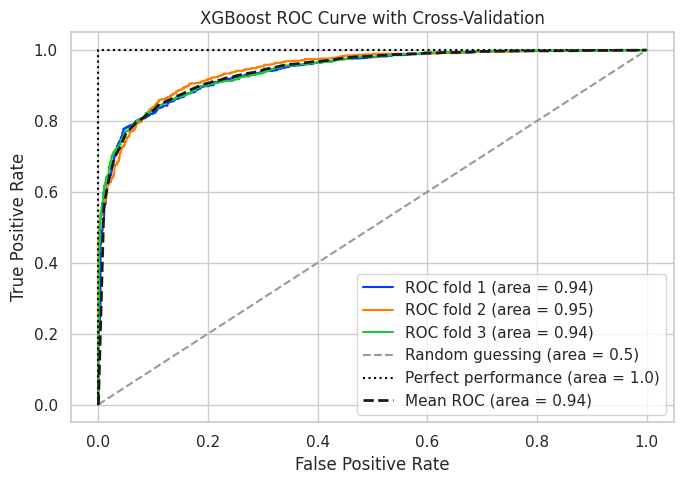

In [42]:
from numpy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#set up cross-validation
cv = list(StratifiedKFold(n_splits=3, shuffle=True, random_state=11).split(X_train_scld, y_train))

#initialize plot
fig = plt.figure(figsize=(7, 5))

#set up arrays to store mean TPR and FPR
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

#loop through each fold
for i, (train_idx, test_idx) in enumerate(cv):
    xgb_model = xgb.XGBClassifier(
        n_estimators=500, 
        learning_rate=0.05, 
        max_depth=4, 
        random_state=11, 
        device= 'gpu')
    xgb_model.fit(X_train_scld[train_idx], y_train.iloc[train_idx])
    probas = xgb_model.predict_proba(X_train_scld[test_idx])[:, 1] 
    fpr, tpr, _ = roc_curve(y_train.iloc[test_idx], probas, pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC fold {i+1} (area = {roc_auc:.2f})')

#plot reference lines
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing (area = 0.5)')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect performance (area = 1.0)')

#mean ROC curve
mean_tpr /= len(cv)  # Average across folds
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

#plot
plt.plot(mean_fpr, mean_tpr, 'k--', label=f'Mean ROC (area = {mean_auc:.2f})', lw=2)

#format
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title("XGBoost ROC Curve with Cross-Validation")
plt.tight_layout()

plt.show()

High AUC's, steep curve, stable predictions across the folds

#### Predict on Test Data Xh

In [43]:
#predict probability of churn
y_test_proba = xgb_model.predict_proba(Xh_scld)[:, 1]

Convert predictions to df with the ids

In [44]:
xgb_model_predict = pd.DataFrame({
    'id': df_h['id'],
    'label': y_test_proba.round(2)})

#xgb_model_predict.to_csv('xgb_predictions_PP.csv', index=False)

Result: 0.75685 ROC-AUC for the Test Data

## Second Attempt - The Models Selected for Submission

Here we apply a weighted blending of XGBoost and RF to hopefully improve performance.

In [45]:
#SMOTE Tomek test set with split 0.2
#blend XGBoost + Random Forest prediction probabilities
rf_preds = best_rf1.predict_proba(X_test)[:, 1]
xgb_preds = xgb_model.predict_proba(X_test)[:, 1]
final_preds = (rf_preds * 0.4) + (xgb_preds * 0.6)

#make sure id's are correct
df_h_original = pd.read_csv('/kaggle/input/churndata/test.csv')
df_h['id'] = df_h_original['id'].values 

#convert to df/save submission file
submission = pd.DataFrame({'id': df_h['id'], 'label': final_preds})
submission['label'] = submission['label'].round(5)
#submission.to_csv("submission2.csv", index=False)

Result: 0.84879 ROC-AUC for the Test Data

## Third Attempt

### Feature Reduction - 'No internet service'

In [46]:
#identify columns with 'No internet service' value
cols_with_no_internet = [
    'online_security', 'online_backup', 'device_protection', 
    'tech_support', 'streaming_tv', 'streaming_movies']

#convert 'No Internet Service' to 'No'
def process_no_internet(df):
    for col in cols_with_no_internet:
        df[col] = df[col].replace('No internet service', 'No') 
    return df

#apply transformation
df_a = process_no_internet(df_a)
df_h = process_no_internet(df_h)

### Redefine the Training Set

Here we make a new training set to include the feature reduction.

In [47]:
from imblearn.combine import SMOTETomek

#update cont feat
num_feat = ['tenure', 'monthly_charges', 'total_charges', 'mc_tenure']

#prep data
X = df_a.drop(columns=['id', 'label'])
y = df_a['label']
X_test = df_h.drop(columns=['id'])

#define scld columntransformer
preprocessor_scld = ColumnTransformer(
    transformers=[
        ("cat", cat_trf, cat_feat),
        ("num", num_trf, num_feat),
        ("ord", ord_trf, ord_feat)], 
    remainder='passthrough')

#transforming train data
X = preprocessor_scld.fit_transform(X)
X_test = preprocessor_scld.transform(X_test)

#SMOTETomek balancing
smote_tomek = SMOTETomek(random_state=11)
X_smote, y_smote = smote_tomek.fit_resample(X, y)

#split
X_train_scld, X_val_scld, y_train, y_val = train_test_split(
    X_smote, 
    y_smote, 
    test_size=0.25, 
    random_state=11, 
    stratify=y_smote)

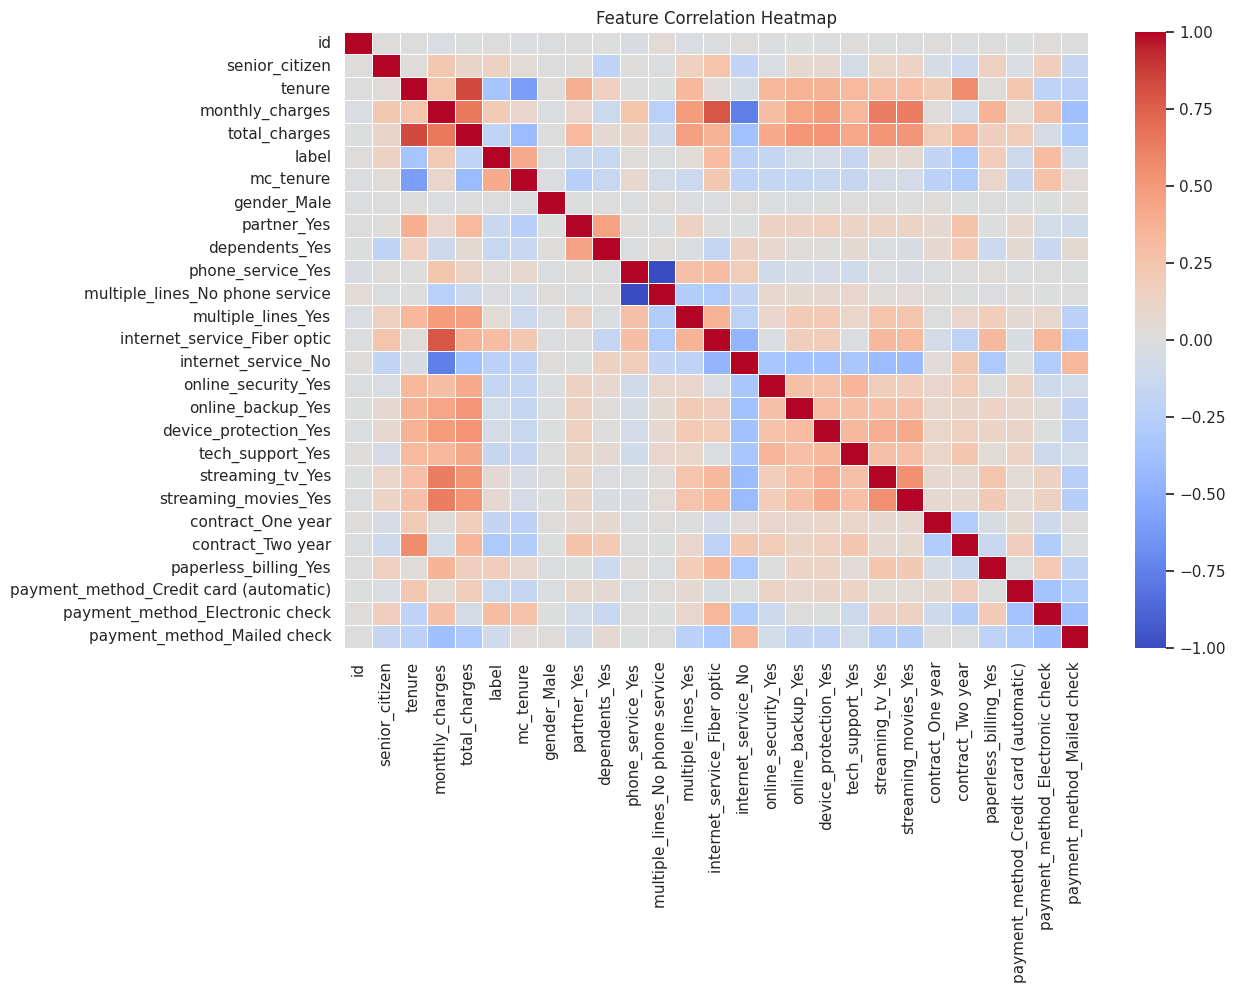

In [48]:
#encode
df_encoded = pd.get_dummies(df_a, drop_first=True)

#corr matrix
corr_matrix = df_encoded.corr()

#plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

### Making the Predicitons

Here we confirm the top performing RF classifier.

In [49]:
best_rf = RandomForestClassifier(random_state=11)
best_rf.fit(X_train_scld, y_train)
#ROC-AUC
roc_auc_rf = roc_auc_score(y_val, best_rf.predict_proba(X_val_scld)[:, 1])
#accuracy
y_val_pred_rf = best_rf.predict(X_val_scld)
accuracy = accuracy_score(y_val, y_val_pred_rf)

print(f"Best ROC-AUC: {roc_auc_rf:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Best ROC-AUC: 0.9433
Validation Accuracy: 0.8799


Fit XGBoost model with new training set.

In [50]:
#set hyperparams
xgb_model = xgb.XGBClassifier(
    n_estimators=500, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=11, 
    device= 'gpu')

#train
xgb_model.fit(X_train_scld, y_train)

#predict probability of churn
y_val_proba = xgb_model.predict_proba(X_val_scld)[:, 1]

#roc-auc
val_auc = roc_auc_score(y_val, xgb_model.predict_proba(X_val_scld)[:, 1])

#accuracy
y_val_pred_xg = xgb_model.predict(X_val_scld)
accuracy = accuracy_score(y_val, y_val_pred_xg)

print(f'XGboost ROC-AUC 'f'{val_auc:.4f}, Accuracy' f'{accuracy:.4f}')

XGboost ROC-AUC 0.9434, Accuracy0.8663


In [51]:
#SMOTE Tomek test set with 0.25 split
#blend XGBoost + Random Forest prediction probabilities
rf_preds = best_rf.predict_proba(X_test)[:, 1]
xgb_preds = xgb_model.predict_proba(X_test)[:, 1]
final_preds = (rf_preds * 0.6) + (xgb_preds * 0.4)

#make sure id's are correct
df_h_original = pd.read_csv('/kaggle/input/churndata/test.csv')
df_h['id'] = df_h_original['id'].values 

#convert to df/save submission file
submission = pd.DataFrame({'id': df_h['id'], 'label': final_preds})
submission['label'] = submission['label'].round(5)
#submission.to_csv("submission3.csv", index=False)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# re-training Logistic Regression
best_lr = LogisticRegression()
best_lr.fit(X_train_scld, y_train)

# re-training SVM and KNN
models = [
    ('SVM', SVC(probability=True)),
    ('KNN', KNeighborsClassifier())
]

for name, model in models:
    model.fit(X_train_scld, y_train)

# re-training Decision Tree and Random Forest
best_rf1 = RandomForestClassifier(random_state=11)
best_rf1.fit(X_train_scld, y_train)

# re-training XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=8, random_state=11)
xgb_model.fit(X_train_scld, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=11, ...)

In [53]:
# defining models and their predictions
model_predictions = {
    'Logistic Regression': best_lr.predict_proba(X_val_scld)[:, 1],
    'SVM': models[0][1].predict_proba(X_val_scld)[:, 1],
    'KNN': models[1][1].predict_proba(X_val_scld)[:, 1],
    'Decision Tree': best_rf1.predict_proba(X_val_scld)[:, 1],
    'Random Forest': best_rf1.predict_proba(X_val_scld)[:, 1],
    'XGBoost': xgb_model.predict_proba(X_val_scld)[:, 1]
}


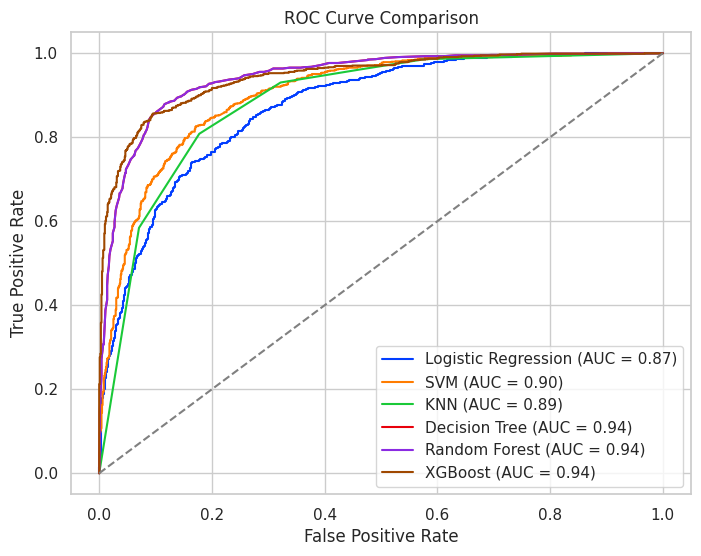

In [54]:
plt.figure(figsize=(8, 6))

for model_name, y_pred_proba in model_predictions.items():
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# plotting baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

# plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc='lower right')
plt.show()
